In [1]:
from google.colab import drive, files
import os
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
PROJECT_FOLDER = "/content/gdrive/MyDrive/Colab Notebooks/Data engineering/Laptops case"
os.chdir(PROJECT_FOLDER)
print("Current dir: ", os.getcwd())

Current dir:  /content/gdrive/MyDrive/Colab Notebooks/Data engineering/Laptops case


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('laptops.csv', header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [6]:
df.dtypes

,0
0,object
1,int64
2,object
3,int64
4,int64
5,int64
6,float64
7,float64
8,int64
9,int64


In [7]:
headers = ["Manufacturer", "Category", "Screen", "GPU", "OS", "CPU_core", "Screen_Size_cm", "CPU_frequency", "RAM_GB", "Storage_GB_SSD", "Weight_kg", "Price"]

In [8]:
df.columns = headers

In [9]:
df

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
...,...,...,...,...,...,...,...,...,...,...,...,...
233,Lenovo,4,IPS Panel,2,1,7,35.560,2.6,8,256,1.70,1891
234,Toshiba,3,Full HD,2,1,5,33.782,2.4,8,256,1.20,1950
235,Lenovo,4,IPS Panel,2,1,5,30.480,2.6,8,256,1.36,2236
236,Lenovo,3,Full HD,3,1,5,39.624,2.5,6,256,2.40,883


In [10]:
import numpy as np

## Evaluating the dataset for missing data

In [11]:
missing_data = df.isnull()
missing_data.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
for column in missing_data.columns.values.tolist():
    print(missing_data[column].value_counts())
    print("")

Manufacturer
False    238
Name: count, dtype: int64

Category
False    238
Name: count, dtype: int64

Screen
False    238
Name: count, dtype: int64

GPU
False    238
Name: count, dtype: int64

OS
False    238
Name: count, dtype: int64

CPU_core
False    238
Name: count, dtype: int64

Screen_Size_cm
False    234
True       4
Name: count, dtype: int64

CPU_frequency
False    238
Name: count, dtype: int64

RAM_GB
False    238
Name: count, dtype: int64

Storage_GB_SSD
False    238
Name: count, dtype: int64

Weight_kg
False    233
True       5
Name: count, dtype: int64

Price
False    238
Name: count, dtype: int64



The columns that have null values are the Screen size (4 null values) and the Weight (5 null values).

## Replacing with mean and most frequent value

In [13]:
avg_weight = df["Weight_kg"].mean()
print(avg_weight)

1.8622317596566522


In [14]:
df["Weight_kg"].replace(np.nan, avg_weight, inplace=True)

<ipython-input-14-159b9fa24b76>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Weight_kg"].replace(np.nan, avg_weight, inplace=True)


In [15]:
most_freq_scr_size = df["Screen_Size_cm"].value_counts().idxmax()
print(most_freq_scr_size)

39.624


In [16]:
df["Screen_Size_cm"].replace(np.nan, most_freq_scr_size, inplace=True)

<ipython-input-16-7c828fbce172>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Screen_Size_cm"].replace(np.nan, most_freq_scr_size, inplace=True)


## Data Standardization and Normalizarion 

In [17]:
df["Screen_Size_cm"] = df["Screen_Size_cm"] / 2.54

In [18]:
df

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,14.0,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,15.6,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,15.6,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,13.3,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,15.6,1.8,8,256,1.91,837
...,...,...,...,...,...,...,...,...,...,...,...,...
233,Lenovo,4,IPS Panel,2,1,7,14.0,2.6,8,256,1.70,1891
234,Toshiba,3,Full HD,2,1,5,13.3,2.4,8,256,1.20,1950
235,Lenovo,4,IPS Panel,2,1,5,12.0,2.6,8,256,1.36,2236
236,Lenovo,3,Full HD,3,1,5,15.6,2.5,6,256,2.40,883


In [19]:
df.rename(columns={"Screen_Size_cm": "Screen_Size_inch"}, inplace=True)

In [20]:
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,14.0,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,15.6,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,15.6,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,13.3,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,15.6,1.8,8,256,1.91,837


In [21]:
df["Weight_kg"] = df["Weight_kg"] * 2.205

In [22]:
df.rename(columns={"Weight_kg": "Weight_lbs"}, inplace=True)

In [23]:
df["CPU_frequency"] = df["CPU_frequency"] / df["CPU_frequency"].max()

In [24]:
df.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_lbs,Price
0,Acer,4,IPS Panel,2,1,5,14.0,0.551724,8,256,3.52800,978
1,Dell,3,Full HD,1,1,3,15.6,0.689655,4,256,4.85100,634
2,Dell,3,Full HD,1,1,7,15.6,0.931034,8,256,4.85100,946
3,Dell,4,IPS Panel,2,1,5,13.3,0.551724,8,128,2.69010,1244
4,HP,4,Full HD,2,1,7,15.6,0.620690,8,256,4.21155,837


## Binning and graph

In [25]:
bins = np.linspace(min(df["Price"]), max(df["Price"]), 4)

In [26]:
group_names = ["Low", "Medium", "High"]

In [27]:
df["Price-binned"] = pd.cut(df["Price"], bins, labels=group_names, include_lowest=True)

In [28]:
df[["Price", "Price-binned"]]

,Price,Price-binned
0,978,Low
1,634,Low
2,946,Low
3,1244,Low
4,837,Low
...,...,...
233,1891,Medium
234,1950,Medium
235,2236,Medium
236,883,Low


In [29]:
import matplotlib.pyplot as plt

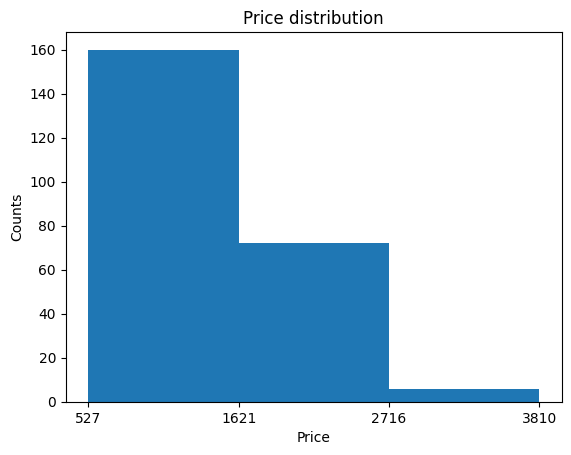

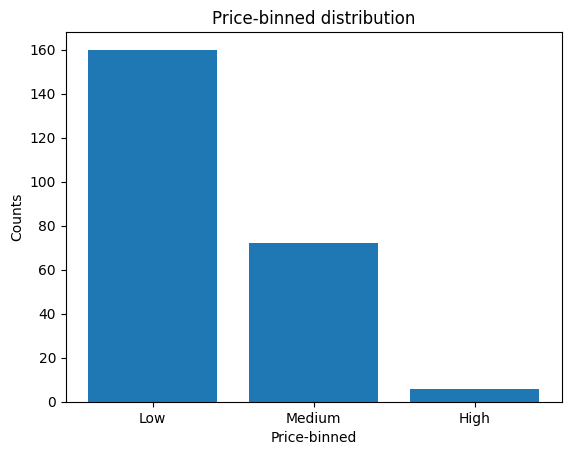

In [30]:
plt.hist(df["Price"], bins=3)
plt.xlabel("Price")
plt.ylabel("Counts")
plt.title("Price distribution")
plt.xticks(bins)
plt.show()

plt.bar(group_names, df["Price-binned"].value_counts())
plt.xlabel("Price-binned")
plt.ylabel("Counts")
plt.title("Price-binned distribution")
plt.show()

## Turning the Screen attribute into two indicator variables

In [31]:
df[["Screen-IPS_panel", "Screen-Full_HD"]] = pd.get_dummies(df["Screen"])

In [32]:
df.drop("Screen", axis=1, inplace=True)

In [33]:
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_lbs,Price,Price-binned,Screen-IPS_panel,Screen-Full_HD
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,False,True
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,True,False
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,True,False
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,False,True
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,True,False


## Saving the clean and processed dataset into a new csv file

In [34]:
df.to_csv('clean_laptop.csv')